# Scikit-learn

La página oficial de Scitit-learn es [aquí](https://scikit-learn.org/stable/index.html).


### Ejemplo: Regresión Lineal Múltiple

Ahora veamos un ejemplo, siguiendo los pasos para hacer un ajuste.

In [1]:
# Se cargan las librerías que se van a utilizar
import numpy as np
import math
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

In [3]:
## 1) EXTRAER DATOS
# Los datos pueden encontrarse en diferentes formatos, en nuestro caso están en formato csv.

# Se carga la base de datos y se definen las varibles X y Y
datos = pd.read_csv('50_Startups.csv') #Se encuentra en la misma carpeta que el jupyter notebook
X = pd.DataFrame(datos.iloc[:, :-1].values) #Se convierte en data frame
X.columns = datos.columns[:-1] #Ponemos los nombres de las columnas
Y = datos.iloc[:, 4].values #Ganancia

print("type(datos): ",type(datos))
print("type(X)",type(X))
print("type(Y)",type(Y))

type(datos):  <class 'pandas.core.frame.DataFrame'>
type(X) <class 'pandas.core.frame.DataFrame'>
type(Y) <class 'numpy.ndarray'>


In [4]:
## 2) ANÁLISIS EXPLORATORIO
# Se realiza una descripción analítica de los datos.

# Se muestran los primeros 5 datos del data frame
datos.head()

# Los datos corresponden a la información de 50 empresas nuevas. La información que se tiene de cada una de ellas es:
#R&D = Research and development: Gastos de investigación y desarrollo
#Administration: Gastos administrativos
#Marketing Spend: Gastos en las técnicas de comercialización de algún producto
#State: Estado en el que se encuentra la empresa
#Profit: Ganancia


,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [5]:
# Dimensiones del data frame
datos.shape

(50, 5)

In [6]:
# Se cuenta el número de NaN's por columna
datos.isnull().sum()

R&D Spend          0
Administration     0
Marketing Spend    0
State              0
Profit             0
dtype: int64

In [7]:
# Cuenta los valores repetidos de la columna 1 (R&D Spend)
datos["R&D Spend"].value_counts().head()

0.00         2
123334.88    1
165349.20    1
38558.51     1
46014.02     1
Name: R&D Spend, dtype: int64

In [8]:
# Cuenta los valores repetidos de la columna 4 (R&D Spend)
datos["State"].value_counts()

New York      17
California    17
Florida       16
Name: State, dtype: int64

In [9]:
#Se muestran las variables dummies
pd.get_dummies(X['State']).head()

,California,Florida,New York
0,0,0,1
1,1,0,0
2,0,1,0
3,0,0,1
4,0,1,0


In [10]:
'''Se convierte la columna "State" en una columna categórica.
Se elimina la columna de "California" porque se puede obtener su valor cuando las 
columnas "Florida" y "New York" son ambas 0 en el i-ésimo renglón.'''

estados = pd.get_dummies(X['State'],drop_first=True)
estados.head()

,Florida,New York
0,0,1
1,0,0
2,1,0
3,0,1
4,1,0


In [11]:
#Se cambia la columna "State" por las variables dummies creadas
print(X.head())
X=X.drop('State',axis=1)
X=pd.concat([X,estados],axis=1)
X.head()

  R&D Spend Administration Marketing Spend       State
0    165349         136898          471784    New York
1    162598         151378          443899  California
2    153442         101146          407935     Florida
3    144372         118672          383200    New York
4    142107        91391.8          366168     Florida


,R&D Spend,Administration,Marketing Spend,Florida,New York
0,165349,136898,471784,0,1
1,162598,151378,443899,0,0
2,153442,101146,407935,1,0
3,144372,118672,383200,0,1
4,142107,91391.8,366168,1,0


C:\Users\miri_\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

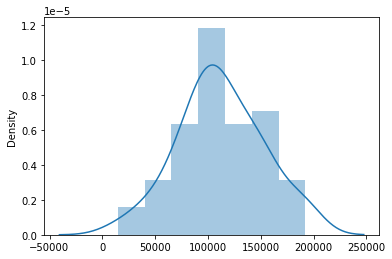

In [12]:
## 3) VISUALIZACIÓN DE LOS DATOS
# Para entender mejor los datos es necesario graficarlos.

sns.distplot(Y)#Ganancia

0.0
165349.2


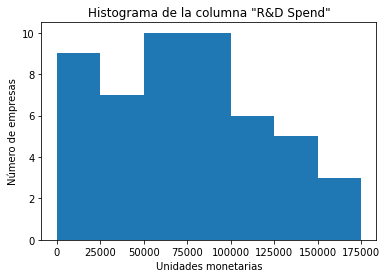

In [13]:
#R&D = Research and development: Gastos de investigación y desarrollo
print(min(X['R&D Spend']))
print(max(X['R&D Spend']))

#Histograma de la columna "R&D Spend"
plt.hist(X['R&D Spend'], bins=[0,25000,50000,75000,100000,
                               125000,150000,175000]) #División cada 25 mil
plt.title('Histograma de la columna "R&D Spend"')
plt.xlabel('Unidades monetarias')
plt.ylabel('Número de empresas')
plt.show()

51283.14
182645.56


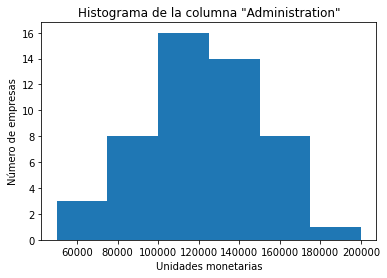

In [14]:
#Administration: Gastos administrativos
print(min(X['Administration']))
print(max(X['Administration']))

#Histograma de la columna "Administration"
plt.hist(X['Administration'], bins=[50000,75000,100000,125000,
                                    150000,175000,200000]) #División cada 25 mil
plt.title('Histograma de la columna "Administration"')
plt.xlabel('Unidades monetarias')
plt.ylabel('Número de empresas')
plt.show()

0.0
471784.1


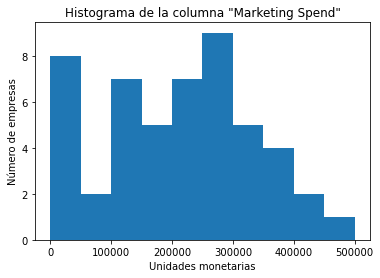

In [15]:
#Marketing Spend: Gastos en las técnicas de comercialización de algún producto
print(min(X['Marketing Spend']))
print(max(X['Marketing Spend']))

#Histograma de la columna "Marketing Spend"
plt.hist(X['Marketing Spend'], bins=[0,50000,100000,150000,200000,250000,
                                     300000,350000,400000,450000,500000]) #División cada 50 mil
plt.title('Histograma de la columna "Marketing Spend"')
plt.xlabel('Unidades monetarias')
plt.ylabel('Número de empresas')
plt.show()

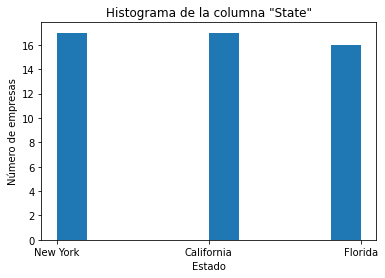

In [16]:
#State: Estado en el que se encuentra la empresa
#Histograma de la columna "State"
plt.hist(datos['State'])
plt.title('Histograma de la columna "State"')
plt.xlabel('Estado')
plt.ylabel('Número de empresas') #17 17 16
plt.show()

<AxesSubplot:xlabel='R&D Spend'>

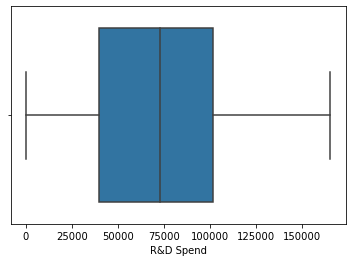

In [17]:
sns.boxplot(x="R&D Spend", data=datos)

In [18]:
round(np.mean(X['R&D Spend']),2) #Promedio de gastos por investigación y desarrollo

73721.62

<AxesSubplot:xlabel='Administration'>

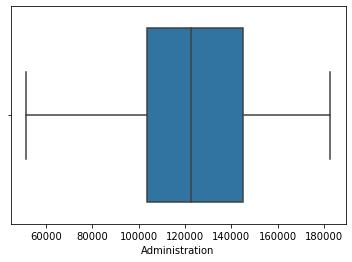

In [19]:
sns.boxplot(x="Administration", data=datos)

In [20]:
round(np.mean(X['Administration']),2) #Promedio de gastos por administración

121344.64

<AxesSubplot:xlabel='Marketing Spend'>

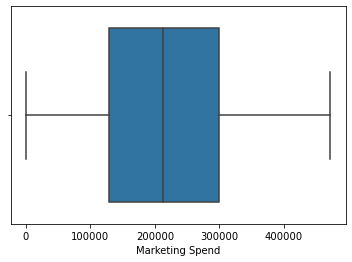

In [21]:
sns.boxplot(x="Marketing Spend", data=datos)

In [22]:
round(np.mean(X['Marketing Spend']),2) #Promedio de gastos por "marketing"

211025.1

<AxesSubplot:>

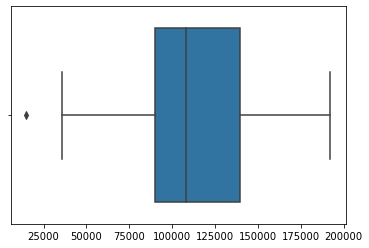

In [22]:
sns.boxplot(x=Y, data=datos)

In [23]:
round(np.mean(Y),2) #Promedio de ganancias

112012.64

In [24]:
min(Y) #Outlier

14681.4

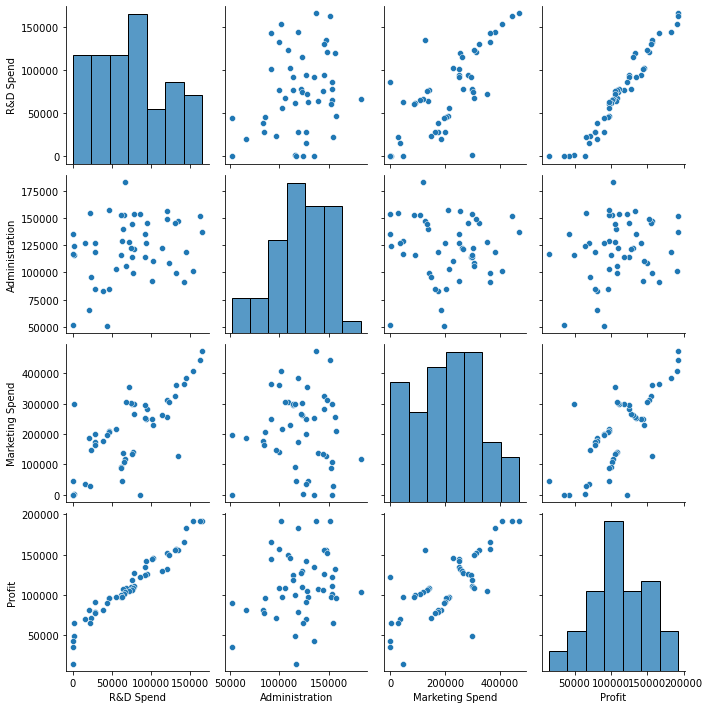

In [25]:
#Se muestra la correlación entre las variables
sns.pairplot(datos)

In [26]:
## 4) DIVIDIR LOS DATOS
# Se separan los datos en 2 grupos (usualmente 80% y 20%):
# i) Para entrenar al modelo (80%)
# ii) Para probar el modelo (20%)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, #Se indican los vectores que se van a dividir
                                                    test_size = 0.2, #Se indica el porcentajede los datos para probar el modelo
                                                    random_state = 0) #Se fija la semilla

# Nota: Tomar la muestra aleatoria es muy importante porque en caso de que los datos estén
#ordenados el algoritmo no aprende adecuadamente. Por ejemplo si tenemos 80 sanos y 20 enfermos,
#sólo se tomarían los 80 sanos (por ser los primeros 80).


In [27]:
## 5) CONSTRUIR UN MODELO
# En este ejemplo vamos a elegir un modelo de regresión lineal simple para "X_train"
regresor = LinearRegression()
regresor.fit(X_train, Y_train)

LinearRegression()

In [28]:
## 6) PREDICCIONES
# Se hacen las predicciones con "X_test"
Y_pred = regresor.predict(X_test)

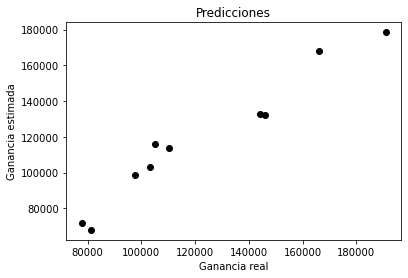

In [29]:
# Se grafican los resultados de la predicción.
plt.scatter(Y_test, Y_pred, color = 'black')
plt.title('Predicciones')
plt.xlabel('Ganancia real')
plt.ylabel('Ganancia estimada')
plt.show()

#Nota: No estamos graficando contra ninguna variable explicativa (R&D, Administration, Marketing Spend, State).
#Los valores de las predicciones se graficaron contra la ganancia real.

#### 7) EVALUACIÓN DEL MODELO
Veamos cómo se comporta el modelo:

7.1 Calcular $R^{2}$ ajustada $ = 1 - \dfrac{(1 - R^{2}) (n-1)}{n - p - 1}$, donde

$R^{2}:$ R cuadrada de los datos

$n:$ Número de datos para entrenar al modelo

$p:$ Número de variables independientes

7.2 Calcular los errores absolutos $(real - estimado)$ y graficarlos

7.3 Calcular los errores relativos $\left( \dfrac{\text{real - estimado}}{\text{real}} \right)$ y graficarlos

7.4 Graficar valores estimados vs valores reales

7.5 Calcular el error cuadrático: $(real − estimado)^{2}$

7.6 Calcular el error cuadrático medio: $\dfrac{\displaystyle \sum_{i = 1}^{n} (real_{i} − estimado_{i})^{2}}{n}$


In [30]:
#7.1 Calcular R^2 ajustada
r_cuadrada = r2_score(Y_test,Y_pred)
print('R^2 = ',round(r_cuadrada,3)) #Porcentaje de los datos explicados por el modelo

#R^2 ajustada
n = len(Y_train)
p = X_train.shape[1]
r_cuad_aj = 1 - (((1-r_cuadrada)*(n-1))/(n-p-1))

print('n = ',n)
print('p = ',p)
print('R^2_aj = ',round(r_cuad_aj,3))

#R^2 ajustada se utiliza para comparar modelos que tengan diferente número de predictores.
#R^2 siempre aumenta cuando se agrega un predictor al modelo, aún cuando no haya una mejora real en el modelo.

R^2 =  0.935
n =  40
p =  5
R^2_aj =  0.925


[   267.18  11677.12  13674.21   5822.73  12512.91 -11152.93  13377.37
  -1308.17  -3617.19  -1733.13]


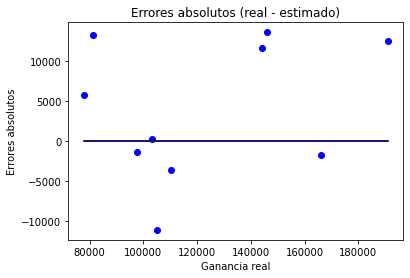

In [31]:
#7.2 Calcular los errores absolutos (real - estimado) y graficarlos
err_abs = Y_test-Y_pred

print(np.around(err_abs,2))
plt.scatter(Y_test, err_abs, color = 'blue')
plt.plot(Y_test, np.zeros(len(err_abs)), color = 'midnightblue') #Recta en Y = 0
plt.title('Errores absolutos (real - estimado)')
plt.xlabel('Ganancia real')
plt.ylabel('Errores absolutos')
plt.show()

[ 0.003  0.081  0.094  0.075  0.065 -0.106  0.165 -0.013 -0.033 -0.01 ]


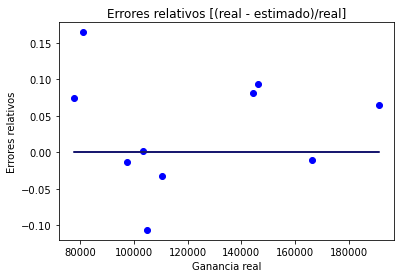

In [32]:
#7.3 Calcular los errores relativos [(real - estimado)/real] y graficarlos
err_rel = err_abs/Y_test

print(np.around(err_rel,3))
plt.scatter(Y_test, err_rel, color = 'blue')
plt.plot(Y_test, np.zeros(len(err_abs)), color = 'midnightblue') #Recta en Y = 0
plt.title('Errores relativos [(real - estimado)/real]')
plt.xlabel('Ganancia real')
plt.ylabel('Errores relativos')
plt.show()

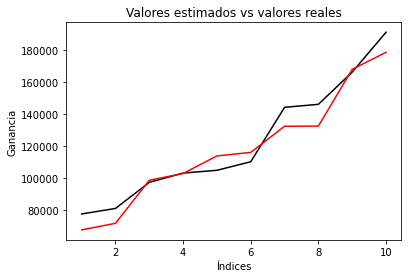

In [33]:
#7.4 Graficar valores estimados vs valores reales
X = range(1,len(Y_test)+1)
plt.plot(X, sorted(Y_test), color = 'black') #Recta de valores reales
plt.plot(X, sorted(Y_pred), color = 'red') #Recta de valores estimados
plt.title('Valores estimados vs valores reales')
plt.xlabel('Índices')
plt.ylabel('Ganancia')
plt.show()

#Nota: Tanto los valores reales como los estimados se ordenaron de menor a mayor.

In [34]:
#7.5 Calcular el error cuadrático = (real − estimado)^2
#print(np.around(err_abs,2))
err_cuad = pow(err_abs,2)
print(err_cuad)

[7.13842985e+04 1.36355187e+08 1.86984061e+08 3.39042020e+07
 1.56572861e+08 1.24387899e+08 1.78953972e+08 1.71131855e+06
 1.30840297e+07 3.00372468e+06]


In [35]:
#7.6 Calcular el error cuadrático medio = (1/n) * \sum (real − estimado)^2
'''
Indica qué tan cerca está la línea de la regresión lineal de los valores estimados.
i) Se elevan al cuadrado los errores absolutos.
ii) Se suman.
iii) Se divide el resultado entre el número de datos estimados.
'''
err_cuad_medio = mean_squared_error(Y_test, Y_pred)
print(round(err_cuad_medio,2))
print(round(math.sqrt(err_cuad_medio),2))#Raíz cuadrada del error cuadrático medio

83502864.03
9137.99


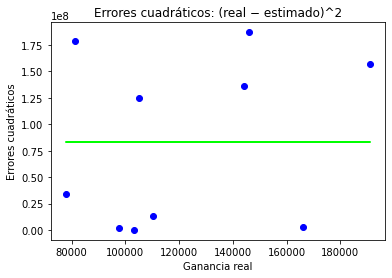

In [36]:
#Graficamos los errores cuadráticos
Y= np.repeat(err_cuad_medio, len(err_cuad))
plt.scatter(Y_test, err_cuad, color = 'blue')
plt.plot(Y_test,Y , color = 'lime') #Recta en Y = err_cuad_medio
plt.title('Errores cuadráticos: (real − estimado)^2')
plt.xlabel('Ganancia real')
plt.ylabel('Errores cuadráticos')
plt.show()

## CONCLUSIONES:

    - El modelo explica el 92.5% de los datos.
    - Existe una correlación lineal entre la ganancia y las variables predictoras (R&D, Administration, Marketing Spend, State).
    